In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
# os.chdir('C:\Users\PC\Desktop\Project\Traffic_signal_classification.ipynb')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [44]:
os.chdir(r'C:\Users\PC\Desktop\Project')

Store data , labels in the list

In [45]:
data = []
labels = []
# we have 43 classes
cur_path = os.getcwd()

In [46]:
cur_path

'c:\\Users\\PC\\Desktop\\Project'

Preprocess the images

In [47]:
classes = 43
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

Converting into numpy arrays

In [48]:
data = np.array(data)
labels = np.array(labels)

Save labels and data for future Use

In [49]:
np.save('./Meta/data',data)
np.save('./Meta/target',labels)

Load data & Labels

In [50]:
data=np.load('./Meta/data.npy')
labels=np.load('./Meta/target.npy')

In [51]:
data.shape,labels.shape

((39209, 30, 30, 3), (39209,))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

Convert labels to onehot encoding

In [54]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [55]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

Build the Model

In [56]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 167s 168ms/step - accuracy: 0.3515 - loss: 3.0674 - val_accuracy: 0.8925 - val_loss: 0.4252
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 213s 179ms/step - accuracy: 0.8193 - loss: 0.6241 - val_accuracy: 0.9549 - val_loss: 0.1695
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 178s 154ms/step - accuracy: 0.8849 - loss: 0.4061 - val_accuracy: 0.9621 - val_loss: 0.1326
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 152s 155ms/step - accuracy: 0.9145 - loss: 0.3025 - val_accuracy: 0.9754 - val_loss: 0.0911
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 154s 157ms/step - accuracy: 0.9222 - loss: 0.2703 - val_accuracy: 0.9721 - val_loss: 0.1013
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 150s 153ms/step - accuracy: 0.9243 - loss: 0.2748 - val_accuracy: 0.9765 - val_loss: 0.0902
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 157s 160ms/step - accuracy: 0.9359 - loss: 0.2358 - val_accuracy: 0.9749 - val_loss: 0.1040
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 156s 159ms/step - accuracy: 0.9414 -

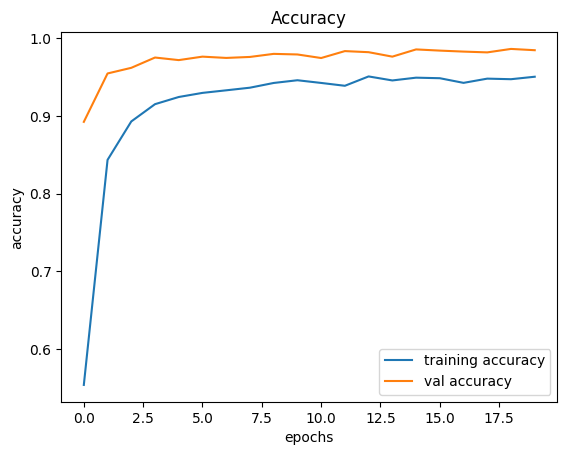

In [60]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

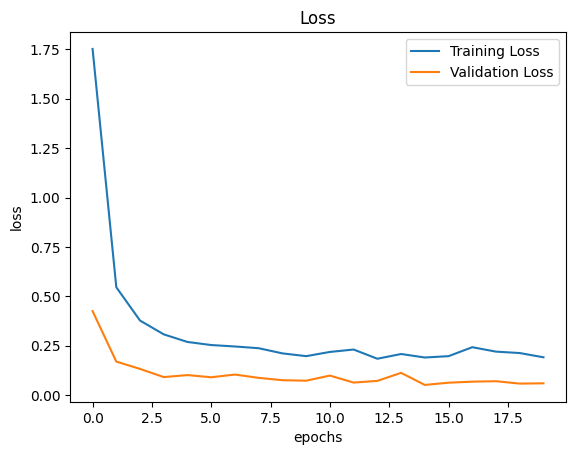

In [61]:
# loss
plt.figure(num=0)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Let's test some data

In [62]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [63]:
X_test,X_label = testing('Test.csv') 

In [65]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step


array([16,  1, 38, ...,  5,  7, 10])

Accuracy in test data

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(X_label,y_pred)

0.9596199524940617

Save the Model

In [67]:
model.save("./Meta/TSC.h5")

Load the model

In [68]:
import os
os.chdir(r'C:\Users\PC\Desktop\Project')
from keras.models import load_model
model = load_model("./Meta/TSC.h5")

In [69]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

Testing an Image

In [70]:
from PIL import Image
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x=model.predict(X_test) 
    Y_pred=np.argmax(predict_x,axis=1)
    return image,Y_pred

In [74]:
plot,prediction = test_on_img(r'C:\Users\PC\Desktop\Project\Test\00065.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


In [75]:
plot

In [76]:
prediction

array([9])

predicted traffic sign is :  No passing


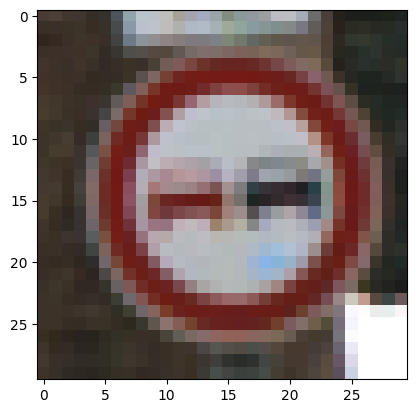

In [77]:
s = [str(i) for i in prediction]
a = int("".join(s))
print("predicted traffic sign is : ",classes[a])
plt.imshow(plot)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
predicted traffic sign is :  Turn right ahead


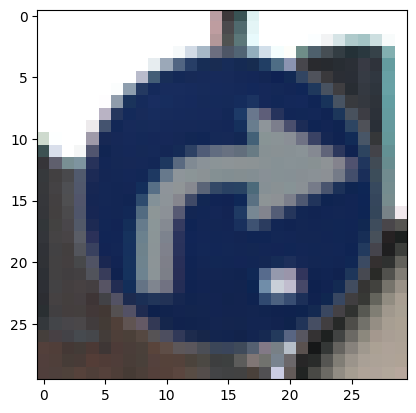

In [82]:
plot2,prediction2 = test_on_img(r'C:\Users\PC\Desktop\Project\Test\00234.png')
s1 = [str(i) for i in prediction2]
a1 = int(''.join(s1))
print("predicted traffic sign is : ",classes[a1])
plt.imshow(plot2)
plt.show()